Where should my company consider opening their next water resort, maximizing profit and minimizing fatalities?

In [3]:
!pip install plotly_express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)


In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [22]:
df = pd.read_csv('attacks.csv', sep=",", index_col = 0, encoding='latin-1')

In [23]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
df.size

591629

In [8]:
df.shape

(25723, 23)

In [15]:
len(df)

25723

In [9]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

df.columns

In [25]:
df = df.drop(['Unnamed: 22', 'Unnamed: 23', 'Area', 'Investigator or Source', 'Name', 'Location', 'Injury', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order'], axis = 1)

In [26]:
df.head()

,Date,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,F,57,N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,11,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,48,N,07h45,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,NaN,2 m shark
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"


In [27]:
df.isna().sum()

Date           19421
Year           19423
Type           19425
Country        19471
Activity       19965
Sex            19986
Age            22252
Fatal (Y/N)    19960
Time           22775
Species        22259
dtype: int64

In [28]:
## teste de valores NaN (coluna Date)

df.dropna(subset=['Date'], inplace = True)

In [29]:
df.isna().sum()

Date              0
Year              2
Type              4
Country          50
Activity        544
Sex             565
Age            2831
Fatal (Y/N)     539
Time           3354
Species        2838
dtype: int64

In [18]:
df

,Date,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,F,57,N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,11,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,48,N,07h45,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,NaN,2 m shark
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...
ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN,NaN
ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN,NaN
ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,M,NaN,Y,NaN,NaN


In [44]:
df = df.drop(['Species '], axis = 1)

In [45]:
df.head()

,Date,Year,Type,Country,Activity,Sex,Fatal (Y/N)
Case Number,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,F,N
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,N
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,N
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,N
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,N


In [49]:
df.isna().sum()

Date             0
Year             2
Type             4
Country         50
Activity       544
Sex            565
Fatal (Y/N)    539
dtype: int64

In [50]:
print(df.dtypes)
print('-'*60)
print(df.iloc[0])

Date            object
Year           float64
Type            object
Country         object
Activity        object
Sex             object
Fatal (Y/N)     object
dtype: object
------------------------------------------------------------
Date           25-Jun-2018
Year                2018.0
Type               Boating
Country                USA
Activity          Paddling
Sex                      F
Fatal (Y/N)              N
Name: 2018.06.25, dtype: object


In [51]:
df.dropna(subset=['Year'], inplace = True)
df.Year = df.Year.astype(int)

In [52]:
df.groupby('Year').count()

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
Year,,,,,,
0,125,125,121,107,117,124
5,1,1,1,0,1,1
77,1,1,0,1,1,1
500,1,1,1,0,1,1
1543,1,1,1,1,1,1
...,...,...,...,...,...,...
2014,127,127,126,122,117,118
2015,143,142,143,137,141,130
2016,130,130,130,124,126,119


In [54]:
df = df.loc[df['Year'] > 1960,:]
df = df.loc[df['Year'] < 2018,:]

In [55]:
table = df.groupby('Year').count()

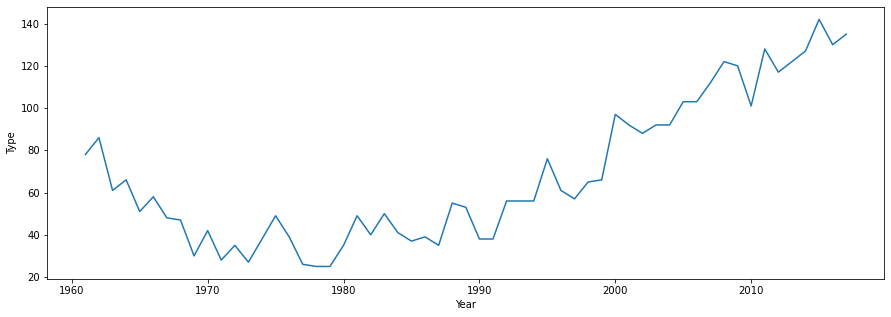

In [56]:
plt.figure(figsize = (15,5))
sns.lineplot(data=table, x="Year", y = table['Type'])
plt.show()

In [57]:
df.head()

,Date,Year,Type,Country,Activity,Sex,Fatal (Y/N)
Case Number,,,,,,,
2017.12.31,31-Dec-2017,2017,Unprovoked,USA,Surfing,F,N
2017.12.30,30-Dec-2017,2017,Unprovoked,USA,Surfing,F,N
2017.12.21,21-Dec-2017,2017,Provoked,MALAYSIA,Fishing / Wading,M,N
2017.12.09,09-Dec-2017,2017,Unprovoked,BAHAMAS,Snorkeling,F,N
2017.11.30.b,30-Nov-2017,2017,Unprovoked,COSTA RICA,Scuba Diving,M,N


In [58]:
df = df.drop('Date', axis = 1)

In [59]:
print(df['Country'].value_counts())

USA                       1721
AUSTRALIA                  660
SOUTH AFRICA               419
BRAZIL                      98
BAHAMAS                     89
                          ... 
NORTHERN ARABIAN SEA         1
ST. MARTIN                   1
ANGOLA                       1
BRITISH VIRGIN ISLANDS       1
PUERTO RICO                  1
Name: Country, Length: 133, dtype: int64


In [60]:
print(df['Activity'].value_counts())

Surfing                                             942
Swimming                                            482
Spearfishing                                        272
Fishing                                             206
Wading                                              122
                                                   ... 
Spearfishing & diving for paua                        1
Scientific research (Dr. Sonny Gruber's student)      1
Swimming, towing a kayak                              1
Body surfing or body boarding                         1
Light aircraft ditched at sea                         1
Name: Activity, Length: 763, dtype: int64


In [62]:
print(df['Sex '].value_counts())

# NO

M      3064
F       502
M         2
lli       1
Name: Sex , dtype: int64


In [63]:
print(df['Fatal (Y/N)'].value_counts())

## NO

N          3052
Y           480
UNKNOWN      37
M             1
2017          1
Name: Fatal (Y/N), dtype: int64


In [64]:
## Função para juntar pequenos dados em 'Other'

def group(column, threshold):
    table = df[column].value_counts()
    grouped_columns = [i for i in table.index if table[i] < threshold]
    for n in grouped_columns:
        df.loc[df[column] == n, column] = 'Other'
    print(df[column].value_counts())

## Função para plotar histograma        
     
def histogram(column):
    plt.figure(figsize=(20,10))
    grafico = sns.countplot(column,  data = df, order = df[column].value_counts().index)
    grafico.tick_params(axis='x', rotation = 90)

In [65]:
group('Country', 50)

USA                 1721
AUSTRALIA            660
Other                653
SOUTH AFRICA         419
BRAZIL                98
BAHAMAS               89
NEW ZEALAND           77
REUNION               56
MEXICO                52
PAPUA NEW GUINEA      51
Name: Country, dtype: int64


C:\Users\Marcia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


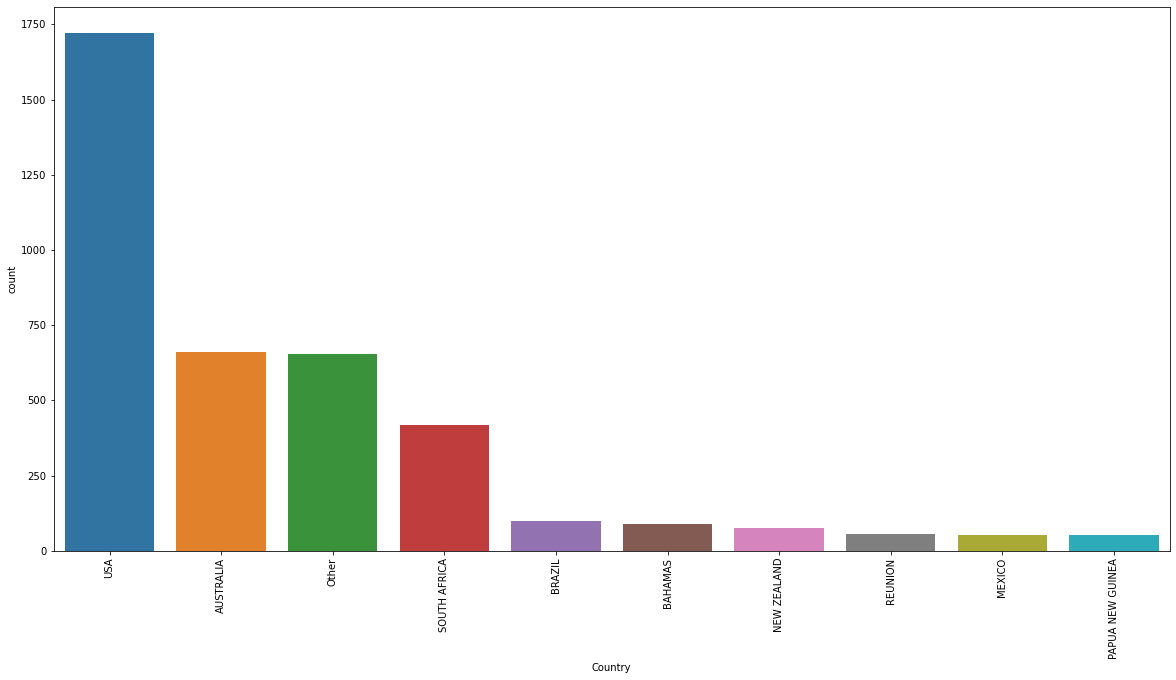

In [66]:
histogram('Country')

In [103]:
df['Sex '].unique()

## NaN ???

array(['F', 'M', nan], dtype=object)

In [68]:
df.loc[df['Sex '].str.contains('M ', case=False, na=False), 'Sex '] = 'M'

In [69]:
df.drop(df[df['Sex '] == 'lli'].index, inplace=True)

In [70]:
print(df['Sex '].value_counts(normalize = True))

M    0.859305
F    0.140695
Name: Sex , dtype: float64


In [102]:
print(df['Sex '].value_counts())

M    2813
F     457
Name: Sex , dtype: int64


C:\Users\Marcia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


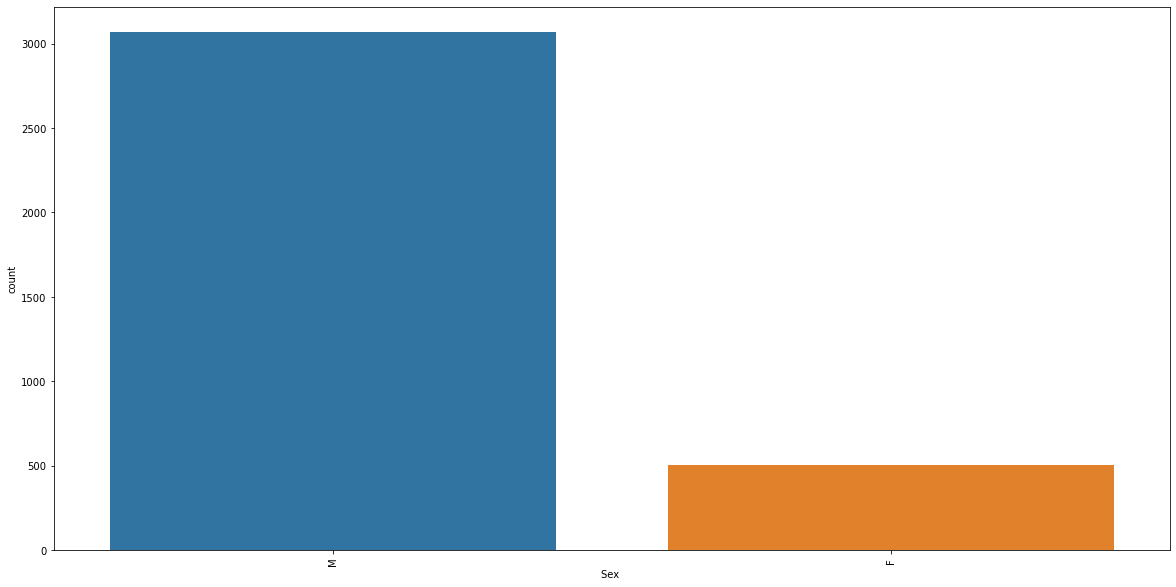

In [71]:
histogram('Sex ')

C:\Users\Marcia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



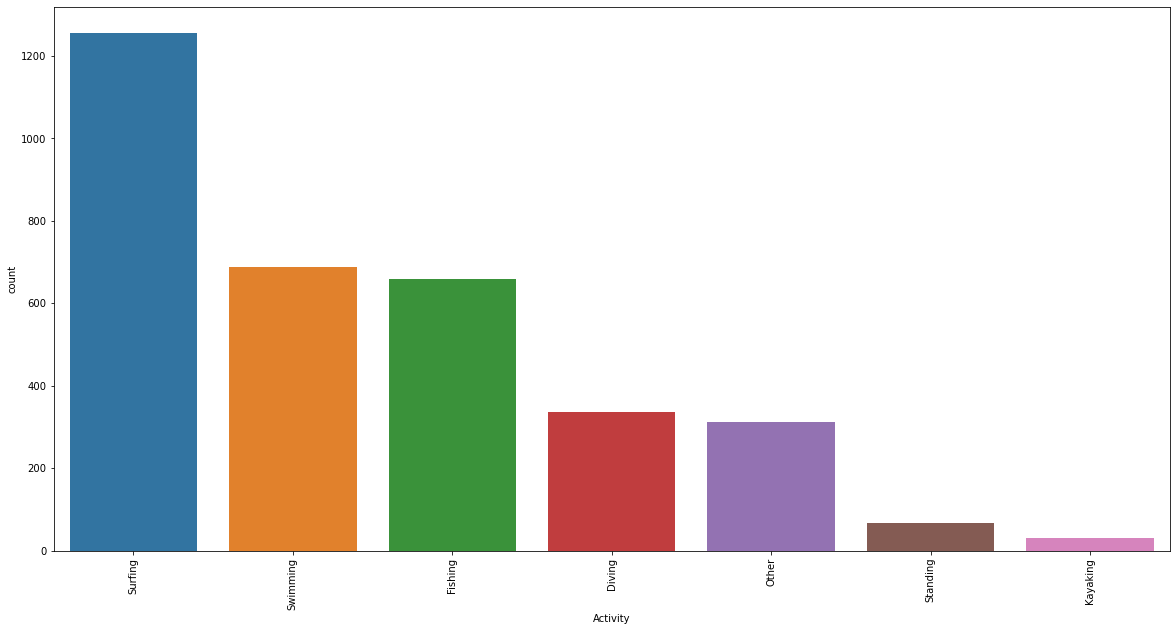

In [99]:
histogram('Activity')

In [95]:
df.loc[df['Activity'].str.contains('surf', case=False, na=False), 'Activity'] = 'Surfing'
df.loc[df['Activity'].str.contains('boarding', case=False, na=False), 'Activity'] = 'Surfing'
df.loc[df['Activity'].str.contains('swim', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('fishing', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('aquarium', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('hunt', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('trap', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('walk', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('wading', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('float', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('Treading water', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('pull', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('pick', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('bath', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('diving', case=False, na=False), 'Activity'] = 'Diving'
df.loc[df['Activity'].str.contains('snorkel', case=False, na=False), 'Activity'] = 'Diving'
df.loc[df['Activity'].str.contains('photo', case=False, na=False), 'Activity'] = 'Photo shoot'
df.loc[df['Activity'].str.contains('film', case=False, na=False), 'Activity'] = 'Filming'
df.loc[df['Activity'].str.contains('float', case=False, na=False), 'Activity'] = 'Floating'
df.loc[df['Activity'].str.contains('boarding', case=False, na=False), 'Activity'] = 'Boarding'
df.loc[df['Activity'].str.contains('wash', case=False, na=False), 'Activity'] = 'Washing'

Outra forma de se solucionar o agrupamento feito acima:

In [114]:
#'Surf'.lower() in 'surf inside a whale'.lower()

True

In [119]:
#def tratamento_col(item):
    #try:
        #if 'surf' in item.lower():
            #return 'surfing' 
    #except:
        #return 'others'

In [116]:
#def tratamento_col(item):
    #try:
        #if 'surf' in item.lower():
            #return 'surfing' 
    #except:
        #return 'others'

'surfing'

In [120]:
df['Activity'].map(tratamento_col)

Case Number
2017.12.31      surfing
2017.12.30      surfing
2017.12.21         None
2017.12.09         None
2017.11.30.b       None
                 ...   
1961.00.00.e       None
1961.01.01         None
1961.00.00.d       None
1961.00.00.b       None
1961.00.00.a       None
Name: Activity, Length: 3531, dtype: object

In [104]:
print(df['Activity'].value_counts())

Surfing     1256
Swimming     688
Fishing      658
Diving       337
Other        313
Standing      66
Kayaking      31
Name: Activity, dtype: int64


In [73]:
print(df['Fatal (Y/N)'].value_counts())

N          3051
Y           480
UNKNOWN      37
M             1
2017          1
Name: Fatal (Y/N), dtype: int64


In [129]:
print(df['Sex '].value_counts())

M    2813
F     457
Name: Sex , dtype: int64


In [135]:
print(df['Country'].value_counts())

USA                 1577
AUSTRALIA            594
Other                588
SOUTH AFRICA         371
BRAZIL                90
BAHAMAS               84
NEW ZEALAND           70
REUNION               56
PAPUA NEW GUINEA      48
MEXICO                45
Name: Country, dtype: int64


In [132]:
df.drop(df[df['Sex '] == 'nan'].index, inplace=True)

In [74]:
df.drop(df[df['Fatal (Y/N)'] == 'UNKNOWN'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == 'M'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == '2017'].index, inplace=True)

In [75]:
print(df['Fatal (Y/N)'].value_counts(normalize = True))

N    0.864061
Y    0.135939
Name: Fatal (Y/N), dtype: float64


C:\Users\Marcia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


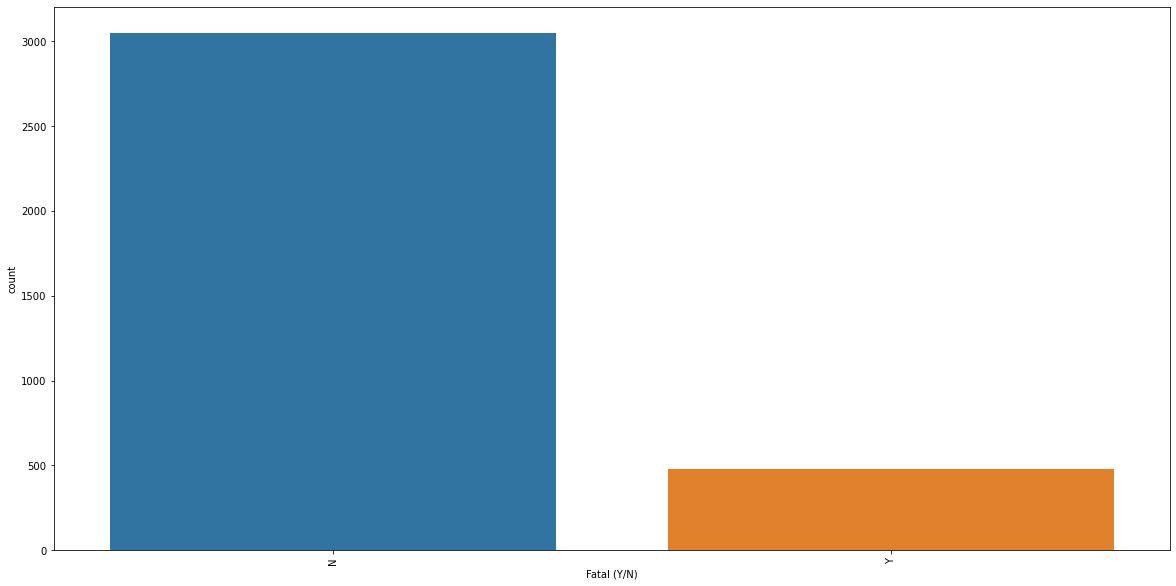

In [76]:
histogram('Fatal (Y/N)')

In [77]:
df.isna().sum()

Year             0
Type             2
Country         11
Activity       241
Sex            302
Fatal (Y/N)    316
dtype: int64

In [78]:
df['Fatal (Y/N)'].dropna(inplace = True)

In [79]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y', nan], dtype=object)

In [80]:
df = df[df['Fatal (Y/N)'].isna() == False]

In [82]:
df

,Year,Type,Country,Activity,Sex,Fatal (Y/N)
Case Number,,,,,,
2017.12.31,2017,Unprovoked,USA,Surfing,F,N
2017.12.30,2017,Unprovoked,USA,Surfing,F,N
2017.12.21,2017,Provoked,Other,Fishing / Wading,M,N
2017.12.09,2017,Unprovoked,BAHAMAS,Snorkeling,F,N
2017.11.30.b,2017,Unprovoked,Other,Scuba Diving,M,N
...,...,...,...,...,...,...
1961.00.00.e,1961,Boat,AUSTRALIA,Fishing for mackerel,NaN,N
1961.01.01,1961,Unprovoked,Other,Taking boat from California to Florida when it...,M,N
1961.00.00.d,1961,Unprovoked,Other,Spearfishing,NaN,N


In [106]:
print(df['Activity'].value_counts())

Surfing     1256
Swimming     688
Fishing      658
Diving       337
Other        313
Standing      66
Kayaking      31
Name: Activity, dtype: int64


In [100]:
for column in df:
    graph = px.histogram(df, x = column, color = 'Fatal (Y/N)')
    graph.show()

In [126]:
print(df['Year'].value_counts())

2015    130
2017    123
2014    118
2016    118
2011    118
2013    114
2009    110
2008    110
2012    107
2007    101
2010     97
2006     93
2005     91
2000     91
2001     87
2003     86
2002     84
2004     82
1962     77
1961     72
1995     65
1998     63
1999     63
1964     57
1996     56
1993     55
1963     54
1994     53
1997     52
1988     51
1992     50
1966     49
1989     45
1975     44
1965     43
1983     43
1981     43
1967     40
1974     38
1970     38
1991     37
1968     37
1976     36
1990     35
1986     35
1972     33
1982     33
1984     33
1985     32
1980     31
1987     30
1971     28
1973     26
1969     25
1979     24
1977     23
1978     22
Name: Year, dtype: int64


Podemos notar que o número de reports de acidentes entre homens e mulheres é substancialmente diferente. De um total de 3270 acidentes reportados (desde o ano de 1961), 2813 são vinculados ao sexo masculino (cerca de 86% do número total); 

Além disso, nota-se que a maioria dos casos ocorre nos EUA, Austrália e África do Sul, sendo as percentagens de mortalidade nestes lugares de 3.9%, 12.6% e 12.7%, respectivamente;

O lugar reportado com menores taxas de mortalidade é os EUA, seguido das Bahamas;

Os maiores números de acidentes são atrelados às atividades de Surfe, Natação e Pescaria, sendo a atividade de surfe a mais popular e a menos letal entre as 3 (6.4% de mortalidade);

87% dos acidentes não são fatais;

As proporções de acidentes fatais entre homens e mulheres é bastante similar, ainda que os casos sejam majoritariamente masculinos. Isso denota uma igualdade de distribuição das atividades entre ambos os sexos.

A fim de se evitar ao máximo acidentes fatais, ainda maximizando lucro, deve-se criar um hotel de atividades aquáticas na costa Estadunidense, EVITANDO-SE lugares com altos índices de desastres marítimos (maior causador de mortalidade por ataques de tubarão) voltando a atenção ao público de países com alto número de reports (denotando haver uma diversidade de praticantes de esportes aquáticos) e maiores proporções de mortalidade, tais como Austrália e África do Sul. Além disso, deve-se focar em atividades relacionadas ao surfe, caiaque e outras práticas relacionadas à utilização de barcos, que possuem alta aderência e baixos índices de mortalidade, focando-se igualmente em homens e mulheres.

Para uma possível futura expansão da operação, recomendo considerarem as Bahamas.